# Water Consumtion in Sonora
## Stage 4

In This stage I have analyzed all the features (exept the gauge features) to find the effect of their existence/absence on the consumption of water in the city of Sonora.

The results showed that there are some effects of the month of the year on the monthly consumption. The resuls also show that there are some obvious effects of some features like lindustry, and agriculture. The detailed results are at the end of this notebook.

In [256]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# # from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score, mean_squared_error
# from sklearn import linear_model
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
from IPython.display import Markdown
import time
from datetime import timedelta
%matplotlib inline

In [2]:
# Reading the tables
main_df = pd.read_csv('Aqua_ref.CSV.gz', compression='gzip')
Usage_df = pd.read_csv('Usage_encoded.CSV')
User_df = pd.read_csv('User_encoded.CSV')
Gauge_df = pd.read_csv('Gauge_encoded.CSV')

In [3]:
# Merging the dataframes into one informative table

df = main_df.merge(Usage_df, 
      left_on='Usage_ref', right_on='Usage_id', 
      how='outer').drop(columns=['Usage_ref', 
                                 'Usage_id', 'Usage_text']).merge(User_df, 
      left_on='User_ref', right_on='User_id', 
      how='outer').drop(columns=['User_ref', 
                                 'User_id', 'User_text']).merge(Gauge_df, 
      left_on='Gauge_ref', right_on='Gauge_id', 
      how='outer').drop(columns=['Gauge_ref',
                                 'Gauge_id', 'Gauge_text', 'Gauge_names'])

# Deleting the main dataframe
# to freeup the memory
main_df = None

# View a sample
df.sample(5)

,Condition,Case,Diameter,Year,Month,Reference,Consumption,industry,housing,agriculture,...,Gauge_Otras_Desconocida,Gauge_Precisa_Ii,Gauge_Recordal,Gauge_Sappel,Gauge_Sappel_Aquarius,Gauge_Sensus,Gauge_Shlumberger,Gauge_Tonhy,Gauge_Yt_Md15,Gauge_Zenner_Half_In
683851,656,161,0.5,13,10,55,20,1,1,0,...,0,0,0,0,0,0,0,0,0,0
6610859,432,2262,0.5,9,2,2425,24,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5700341,455,2994,0.5,14,1,361,10,0,1,0,...,0,0,0,0,0,0,0,0,0,0
11602131,158,721,0.5,14,3,4235,38,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5306085,295,356,0.5,11,3,233,23,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# View the columns names
print(list(df))

['Condition', 'Case', 'Diameter', 'Year', 'Month', 'Reference', 'Consumption', 'industry', 'housing', 'agriculture', 'commerce', 'reserve', 'government', 'low_density', 'mid_density', 'high_density', 'u_industry', 'u_domestic', 'u_social', 'u_commerce', 'u_low_density', 'u_mid_density', 'u_high_density', 'u_residential', 'Gauge_Abb', 'Gauge_Actaris', 'Gauge_Adcom', 'Gauge_Alfa', 'Gauge_Aquarius', 'Gauge_Arad', 'Gauge_Av3Stars', 'Gauge_Azteca', 'Gauge_Azteca_3Vm', 'Gauge_Badger_Combinado', 'Gauge_Badger_M25_Bronce', 'Gauge_Badger_Rcdll25', 'Gauge_Badgermeter', 'Gauge_Barmeters_1_In', 'Gauge_Cicasa_De_La_Unet', 'Gauge_Cicasa_Mmd15_S', 'Gauge_Cicasa_Ng_Half_In', 'Gauge_Cicasa_Ng_Triquarter_In', 'Gauge_Delaunet_Aurus_3Um15', 'Gauge_Delaunet_Md100', 'Gauge_Delaunet_Md15', 'Gauge_Delaunet_Md19', 'Gauge_Delaunet_Md40', 'Gauge_Delaunet_Md50', 'Gauge_Delaunet_Mmd19', 'Gauge_Delaunet_Ud15', 'Gauge_Delaunet_Wd100', 'Gauge_Dorot', 'Gauge_Elster', 'Gauge_Endresshouser', 'Gauge_Ewe', 'Gauge_Generica

# Studying the effect of temporal features
## (Year, Month, and Date)

In [14]:
# Viewing the effect of the years and months
df_Y = df.groupby(['Year'])['Reference', 'Consumption'].mean()
df_M = df.groupby(['Month'])['Reference', 'Consumption'].mean()
# display(df_Y, df_M)

In [79]:
def plot_consumption(x, y_cons, y_ref, 
                     x_label, 
                     y_cons_label="Average Monthly Consumption", 
                     y_ref_label="Reference Consumption"):
    '''
    A function to draw line plots for reference and average monthly consumptions
    Require
    x: the values of X axis
    y_cons: the values of monthly consumption
    y_ref: the values of reference consumption 
    x_label: the label of x axix 
    y_cons_label: the label of monthly consumption axis
                    Default="Average Monthly Consumption" 
    y_ref_label: the label of reference consumption axis
                    Default="Reference Consumption")
                    
    Returns:
        None
    Performs:
        A line plot
    '''
    fig, ax = plt.subplots(figsize=(10, 5))
    ax2 = ax.twinx()
    # df_Y.Consumption.plot(ax=ax, style='r-');
    # df_Y.Reference.plot(ax=ax2, style='b-', secondary_y=True);
    ##x = df_Y.reset_index()['Year']
    ax.plot(x, y_cons, 'r-') # df_Y.Consumption
    ax2.plot(x, y_ref, 'b-') # df_Y.Reference
    ax2.legend((ax.get_lines()[0], ax2.get_lines()[0]), 
               (y_cons_label, y_ref_label), 
               loc='upper center', bbox_to_anchor=(0.5, 1.19),
               ncol=2, fancybox=True, shadow=True);
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_cons_label); ax2.set_ylabel(y_ref_label);

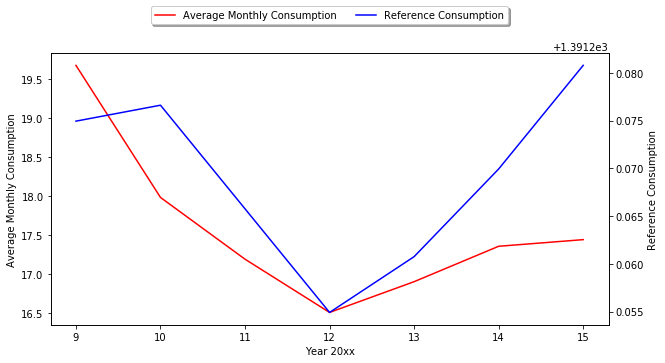

In [80]:
# To see the effect of the year
plot_consumption(df_Y.reset_index()['Year'], 
                 df_Y.Consumption, df_Y.Reference,
                 "Year 20xx")

In [194]:
# Check thr difference in reference consupmtion
df_Y.Reference.max()-df_Y.Reference.min()

0.025864238512440352

* The average monthly consumption was dropped from 19.5 units in 2009, to about 16.5 units in 2012, then increased gradually to about 17.25 in 2015.
* The reference consumtion values are almost fixed over the years (the difference between minimum and maximum values is about 0 units!)

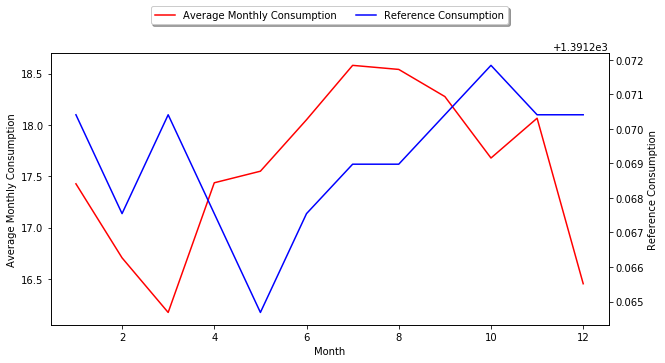

In [81]:
# To see the effect of the month
plot_consumption(df_M.reset_index()['Month'], 
                 df_M.Consumption, df_M.Reference,
                 "Month")

* The average monthly consumption is on its peak (18.5 units) on July and August, and on its minimum (about 16 units) on March and December.
* The reference consumtion values are almost fixed over the months as well.

In [51]:
# To see the effect of the Date combined

# First, create a date column
df.assign(CurrentDate=0)
# assign daates from given years and months
df['CurrentDate'] = pd.to_datetime(dict(year=df.Year+2000, month=df.Month, day=15))
# Create a groupby dataframe
df_Date = df.groupby(['CurrentDate'])['Reference', 'Consumption'].mean()

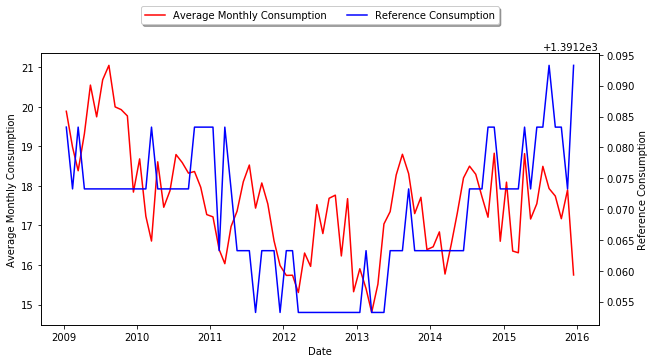

In [82]:
# plot the effect of the Date
plot_consumption(df_Date.reset_index()['CurrentDate'], 
                 df_Date.Consumption, df_Date.Reference,
                 "Date")

* It appears that the average monthly consumption follows a time-series shape with up and down fluctuations. The minimum value was on Q1 of 2013 (about 15 units), and the maximum value was about 21 units in Q3 of 2009.
* The consumption seems to follow the temperature trend, as it is minimum in winter months, and maximum in summer, also some years are warmer than others, which affect water consumption on annual basis.

# Studying the effect of other features 
## (user- or usage- depndent features)

In [130]:
# Defining Usage- dependent and User-dependent features
usage_features = ['industry', 'housing', 'agriculture', 
            'commerce', 'reserve', 'government', 
            'low_density', 'mid_density', 'high_density']
user_features = ['u_industry', 'u_domestic', 'u_social', 
                 'u_commerce', 'u_low_density', 'u_mid_density', 
                 'u_high_density', 'u_residential']

# Create results container
effects = {}

# Add the diameter to the results containter
all_features =['Diameter'] + usage_features + user_features

# Looping through featers
for feature in all_features:
    # create a dataframe of the feature's mean, count, and std.
    df_feature = df.groupby([feature])['Reference', 'Consumption'].agg(['mean','count', 'std'])
    
    # Define a caption for the output
    caption = feature
    brief = feature
    if feature in usage_features:
        brief = feature.replace('_', ' ').title()
        caption = f"{brief} Usage Category"
    if feature in user_features:
        brief = feature[2:].replace('_', ' ').title()
        caption = f"{brief} User's Category"
    
    # Show the captions of done features
    print (caption, end='; ')
    
    # Add the dataframe, the full caption and the brief caption to the dictionary
    effects[feature] = df_feature, caption, brief

Diameter; Industry Usage Category; Housing Usage Category; Agriculture Usage Category; Commerce Usage Category; Reserve Usage Category; Government Usage Category; Low Density Usage Category; Mid Density Usage Category; High Density Usage Category; Industry User's Category; Domestic User's Category; Social User's Category; Commerce User's Category; Low Density User's Category; Mid Density User's Category; High Density User's Category; Residential User's Category; 

In [104]:
# View all the dataframes
for effect in effects:
    print(f'The effects of the {effects[effect][1]} is:')
    display(effects[effect][0])

The effects of the Diameter is:


Reference                            Consumption            \
                  mean     count            std          mean     count   
Diameter                                                                  
0.50       1366.436012  11580275    5835.880654     16.496191  11580275   
0.75       1847.628090     74760    2908.819188     33.732370     74760   
1.00       5594.936508     10584    7740.299467    132.855253     10584   
1.50      19806.531250      2688   22475.044952    435.902158      2688   
2.00      31080.750000      2352   58538.381378    612.620323      2352   
3.00      36283.285714      1176   86346.463046   2375.622449      1176   
4.00      59024.222222       756  113399.062908    625.456349       756   
10.00     61290.000000        84       0.000000  51629.154762        84   

                        
                   std  
Diameter                
0.50         52.168748  
0.75         54.059659  
1.00        202.178724  
1.50        551.203046  
2.00        937.255399  
3.00       1979.062741  
4.00       1264.887734  
10.00     20821.698557

The effects of the Industry Usage Category is:


Reference                        Consumption                      
                 mean     count          std        mean     count         std
industry                                                                      
0         1348.931394  10362364  5624.486499   16.597240  10362364   39.397847
1         1726.089348   1310311  8866.341131   25.328166   1310311  472.650321

The effects of the Housing Usage Category is:


Reference                         Consumption            \
                mean     count           std        mean     count   
housing                                                              
0        5992.727513     31752  22854.080526  294.067429     31752   
1        1378.718070  11640923   5961.593944   16.823167  11640923   

                      
                 std  
housing               
0        2901.184532  
1          58.041440

The effects of the Agriculture Usage Category is:


Reference                         Consumption            \
                    mean     count           std        mean     count   
agriculture                                                              
0            1382.038248  11655539   5968.332070   17.334482  11655539   
1            7669.892157     17136  29710.259225  182.754785     17136   

                         
                    std  
agriculture              
0            161.149364  
1            578.873131

The effects of the Commerce Usage Category is:


Reference                        Consumption                      
                 mean     count          std        mean     count         std
commerce                                                                      
0         1354.159161  10322228  5646.810404   17.152034  10322228  164.232229
1         1674.921237   1350447  8678.945231   20.828076   1350447  150.196075

The effects of the Reserve Usage Category is:


Reference                        Consumption                      
                mean     count          std        mean     count         std
reserve                                                                      
0        1391.783496  11663357  6078.679061   17.534116  11663357  162.212527
1         747.390856      9318  1248.340340   71.663876      9318  459.833109

The effects of the Government Usage Category is:


Reference                         Consumption            \
                   mean     count           std        mean     count   
government                                                              
0           1382.474799  11657975   5973.463102   17.354687  11657975   
1           8365.668571     14700  31173.748369  194.143741     14700   

                        
                   std  
government              
0           161.170598  
1           617.683191

The effects of the Low Density Usage Category is:


Reference                        Consumption            \
                    mean     count          std        mean     count   
low_density                                                             
0            1373.060312  10766872  6301.863431   17.230811  10766872   
1            1607.708678    905803  1922.369804   21.696194    905803   

                         
                    std  
low_density              
0            169.014641  
1             38.051775

The effects of the Mid Density Usage Category is:


Reference                       Consumption           \
                    mean    count          std        mean    count   
mid_density                                                           
0            1232.765284  7818472  5662.236907   17.674962  7818472   
1            1712.803171  3854203  6828.608444   17.379265  3854203   

                         
                    std  
mid_density              
0            197.719551  
1             29.021612

The effects of the High Density Usage Category is:


Reference                       Consumption           \
                     mean    count          std        mean    count   
high_density                                                           
0             1704.438656  6137579  6998.171733   19.363198  6137579   
1             1044.011716  5535096  4830.037628   15.597066  5535096   

                          
                     std  
high_density              
0              84.902057  
1             218.645912

The effects of the Industry User's Category is:


Reference                         Consumption            \
                    mean     count           std        mean     count   
u_industry                                                               
0            1381.674117  11663306   5755.491924   17.109855  11663306   
1           13335.889850      9369  67978.751491  599.524709      9369   

                         
                    std  
u_industry               
0             63.969678  
1           5247.818581

The effects of the Domestic User's Category is:


Reference                        Consumption            \
                   mean     count          std        mean     count   
u_domestic                                                             
0           1484.760632   1452876  8165.617780   27.425499   1452876   
1           1377.978068  10219799  5717.601158   16.177282  10219799   

                        
                   std  
u_domestic              
0           457.524375  
1            21.227080

The effects of the Social User's Category is:


Reference                        Consumption                      
                 mean     count          std        mean     count         std
u_social                                                                      
0         1400.568105  10789583  6307.889981   17.558452  10789583  169.173709
1         1277.654142    883092  1370.712691   17.807936    883092   10.586403

The effects of the Commerce User's Category is:


Reference                        Consumption            \
                   mean     count          std        mean     count   
u_commerce                                                             
0           1380.087308  11112260  5850.800211   16.798703  11112260   
1           1612.988560    560415  9498.470309   33.016347    560415   

                        
                   std  
u_commerce              
0           154.683001  
1           276.589427

The effects of the Low Density User's Category is:


Reference                        Consumption            \
                      mean     count          std        mean     count   
u_low_density                                                             
0              1398.677267  11497033  6120.291346   17.508998  11497033   
1               906.350827    175642  1276.005536   22.049903    175642   

                           
                      std  
u_low_density              
0              163.149880  
1              127.691969

The effects of the Mid Density User's Category is:


Reference                       Consumption           \
                      mean    count          std        mean    count   
u_mid_density                                                           
0              1096.176482  2229142  5149.962041   20.066671  2229142   
1              1460.925581  9443533  6273.117415   16.989717  9443533   

                           
                      std  
u_mid_density              
0              344.452875  
1               68.564098

The effects of the High Density User's Category is:


Reference                        Consumption            \
                       mean     count          std        mean     count   
u_high_density                                                             
0               1388.876759  11656802  6077.427793   17.511323  11656802   
1               3148.150444     15873  4949.596886   66.048888     15873   

                            
                       std  
u_high_density              
0               162.738032  
1                94.557038

The effects of the Residential User's Category is:


Reference                        Consumption            \
                      mean     count          std        mean     count   
u_residential                                                             
0              1449.411528  10527509  6306.467390   17.735177  10527509   
1               856.765803   1145166  3227.036568   16.126207   1145166   

                           
                      std  
u_residential              
0              171.242030  
1               12.694139

In [162]:
def human_format(num):
    '''
    A function to format long numbers as strings
    Source
    https://stackoverflow.com/questions/579310/formatting-long-numbers-as-strings-in-python
    '''
    num = float('{:.3g}'.format(num))
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return '{}{}'.format('{:f}'.format(num).rstrip('0').rstrip('.'), 
                         ['', 'K', 'M', 'B', 'T'][magnitude])
# test
# human_format(103525152)

In [265]:
def plot_bars(y_cons, y_ref,
              x_label, x_brief_caption,
              counts,
              y_cons_label="Average Monthly Consumption",
              y_ref_label="Reference Consumption",
              boolean_x_ticks=None):
    '''
    A function to draw bar plots for reference and average monthly consumptions
    Require:
    y_cons: the values of monthly consumption
    y_ref: the values of reference consumption 
    x_label: the label of x axix 
    x_brief_caption: the brief label of the feature
    y_cons_label: the label of monthly consumption axis
                    Default="Average Monthly Consumption" 
    y_ref_label: the label of reference consumption axis
                    Default="Reference Consumption"
    boolean_x_ticks: if None the 0 and 1 will be converted to more 
                        informative string that include the feature name, 
                        and whether it exists or not.
                     if Nont None, it should be a list that maps the labels
                        of the X ticks
                     Default=None)
                    
    Returns:
        None
    Performs:
        A line plot
    '''
    ind = np.arange(len(y_cons))  # the x locations for the groups
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(6, 3))
    ax2 = ax.twinx()
    rects1 = ax2.bar(ind - width/2, y_cons, width, color='sienna', label=y_ref_label)
    rects2 = ax.bar(ind + width/2, y_ref, width, color='tan', label=y_cons_label)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel(x_label)
    ax.set_title(f'Effect of {x_label} on Reference and monthly consumption')
    ax.set_xticks(ind)
    if boolean_x_ticks  is None:
        ax.set_xticklabels((f'No {x_brief_caption} cases\n({human_format(counts[0])} records)', 
                        f'{x_brief_caption} cases exists\n({human_format(counts[1])} records)'))
    else:
        captions = [f'{cap}\n{human_format(cnt)}' \
                    for cap, cnt in zip(boolean_x_ticks, counts)]
        ax.set_xticklabels(captions)
        
    ax2.set_ylabel(y_ref_label)
    ax.set_ylabel(y_cons_label)
    ax2.legend(loc='upper left', bbox_to_anchor=(0.5, 1.28),
                   ncol=2, fancybox=True, shadow=True);
    ax.legend(loc='upper right', bbox_to_anchor=(0.5, 1.28),
                   ncol=2, fancybox=True, shadow=True);
# # Testing code for the function
# dfs = effects['industry']
# counts = dfs[0].loc[:, ('Reference', 'count')].tolist()
# plot_bars(dfs[0].loc[:, ('Reference', 'mean')], 
#          dfs[0].loc[:, ('Consumption', 'mean')],
#          dfs[1], dfs[2], counts)

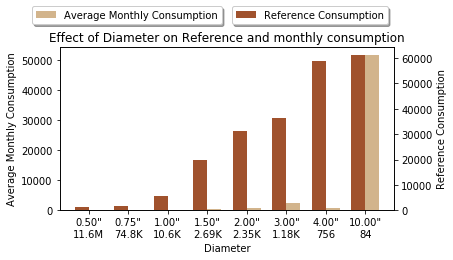

In [266]:
# Plotting the pipe's diameter effect

dfs = effects[list(effects.keys())[0]]
counts = dfs[0].loc[:, ('Reference', 'count')].tolist()
diameters = dfs[0].reset_index()['Diameter'].tolist()
labels = [f'{d:4.2f}"' for d in diameters]
plot_bars(dfs[0].loc[:, ('Reference', 'mean')], 
          dfs[0].loc[:, ('Consumption', 'mean')], 
          dfs[1], dfs[2], counts, boolean_x_ticks=labels)

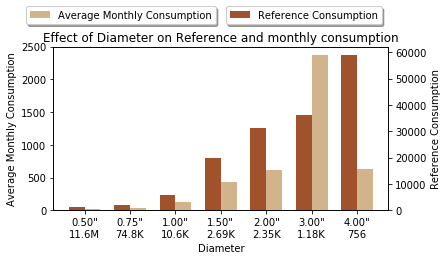

In [267]:
# Selecting the pipe diameters up to 4" to see more details

selection = dfs[0].loc[:4,:]
counts = selection.loc[:, ('Reference', 'count')].tolist()
diameters = selection.reset_index()['Diameter'].tolist()
labels = [f'{d:4.2f}"' for d in diameters]
plot_bars(selection.loc[:, ('Reference', 'mean')], 
          selection.loc[:, ('Consumption', 'mean')], 
          dfs[1], dfs[2], counts, boolean_x_ticks=labels)

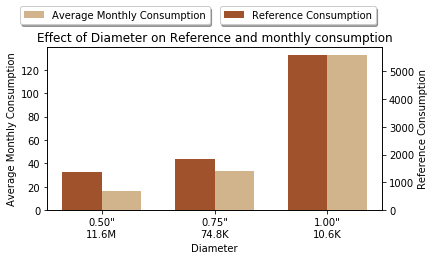

In [268]:
# Selecting the pipe diameters up to 1.0" to see more details

selection = dfs[0].loc[:1.0,:]
counts = selection.loc[:, ('Reference', 'count')].tolist()
diameters = selection.reset_index()['Diameter'].tolist()
labels = [f'{d:4.2f}"' for d in diameters]
plot_bars(selection.loc[:, ('Reference', 'mean')], 
          selection.loc[:, ('Consumption', 'mean')], 
          dfs[1], dfs[2], counts, boolean_x_ticks=labels)

### The effects of the <span style='color:red'>Industry Usage Category</span> is:

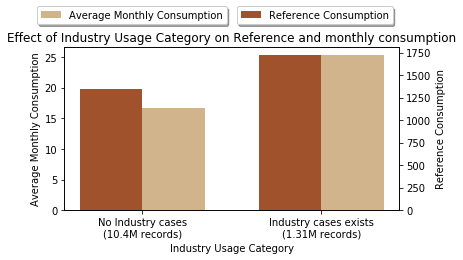

### The effects of the <span style='color:red'>Housing Usage Category</span> is:

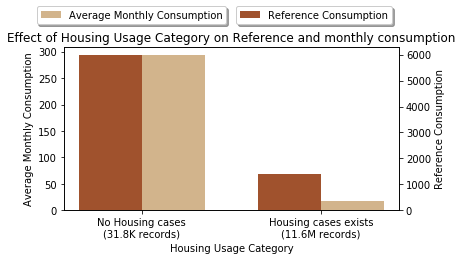

### The effects of the <span style='color:red'>Agriculture Usage Category</span> is:

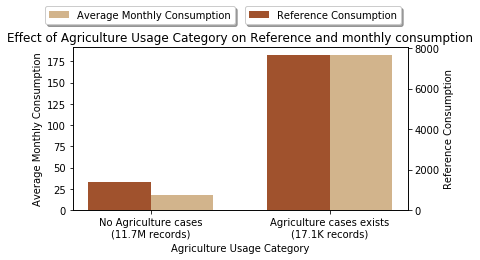

### The effects of the <span style='color:red'>Commerce Usage Category</span> is:

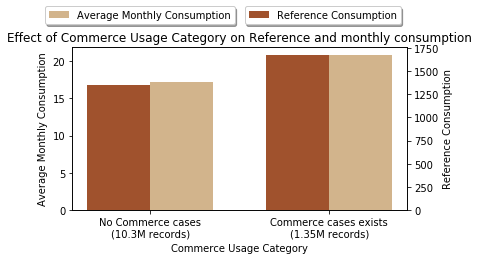

### The effects of the <span style='color:red'>Reserve Usage Category</span> is:

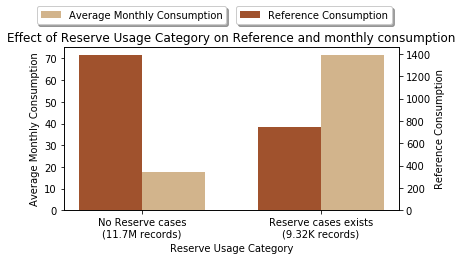

### The effects of the <span style='color:red'>Government Usage Category</span> is:

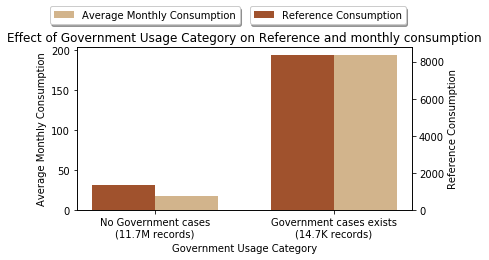

### The effects of the <span style='color:red'>Low Density Usage Category</span> is:

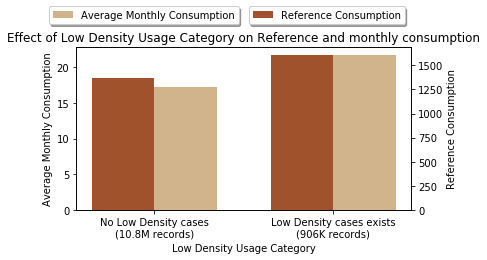

### The effects of the <span style='color:red'>Mid Density Usage Category</span> is:

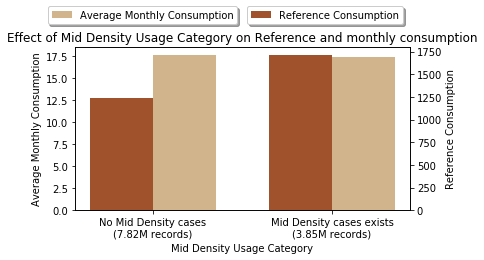

### The effects of the <span style='color:red'>High Density Usage Category</span> is:

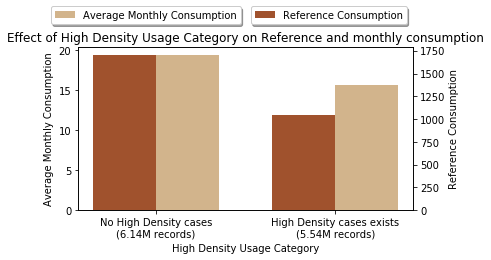

### The effects of the <span style='color:red'>Industry User's Category</span> is:

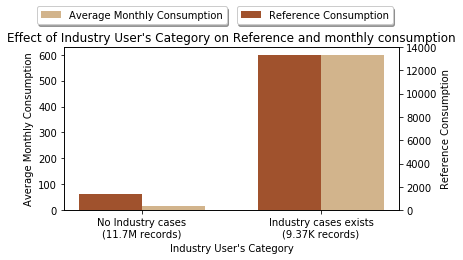

### The effects of the <span style='color:red'>Domestic User's Category</span> is:

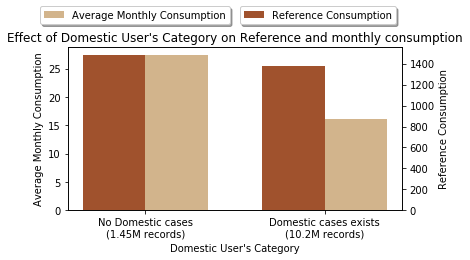

### The effects of the <span style='color:red'>Social User's Category</span> is:

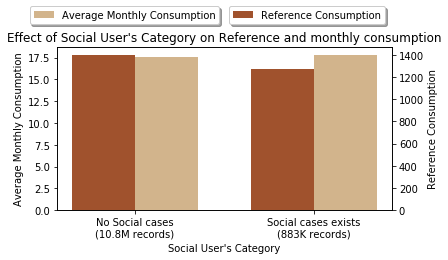

### The effects of the <span style='color:red'>Commerce User's Category</span> is:

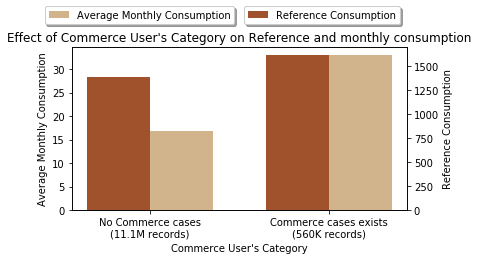

### The effects of the <span style='color:red'>Low Density User's Category</span> is:

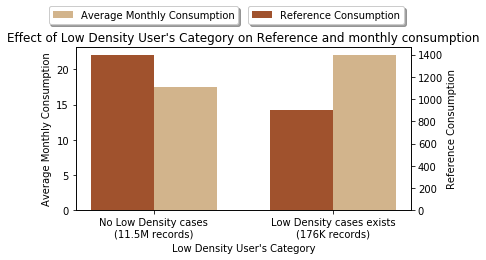

### The effects of the <span style='color:red'>Mid Density User's Category</span> is:

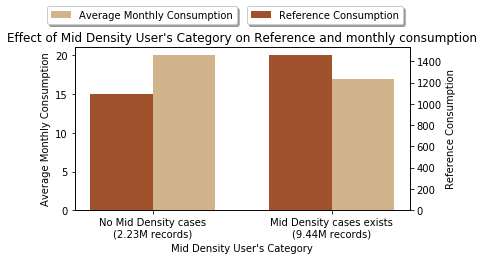

### The effects of the <span style='color:red'>High Density User's Category</span> is:

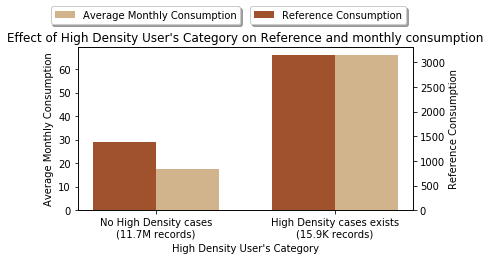

### The effects of the <span style='color:red'>Residential User's Category</span> is:

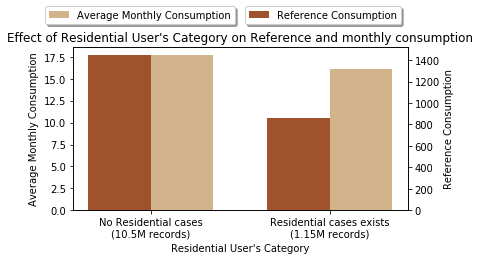

In [271]:
for effect in list(effects.keys())[1:]:    
    # define the dicionary entry of the feature
    #    which includes the dataframe, caption, and brief title
    dfs = effects[effect]
    # Using the jupyter display and Markdown methods to print clear titles
    caption = f"### The effects of the <span style='color:red'>{dfs[1]}</span> is:"
    display(Markdown(caption))
    # find the counts of each records-group
    counts = dfs[0].loc[:, ('Reference', 'count')].tolist()
    # plottting
    plot_bars(dfs[0].loc[:, ('Reference', 'mean')], 
         dfs[0].loc[:, ('Consumption', 'mean')], dfs[1], dfs[2], counts)
    # finalizing the plot
    plt.show()  

### Comments on the features effects

#### The Industry Usage Category
It appears that the existence of this category increases both the reference consumption (RC) and the Average Monthly Consumption (AMC), however, the increase is not so significant (from 17 units to 25 units AMC, and from 1100 to 1750 units of RC. Notice that most of the cases are non-industrial (10.4M records) vs. 1.3M records of industrial records; this means that the industry is not a big player in water consumption.

#### The Housing Usage Category
Unlike the industry category, the housing records are significantly less than the non-housing records. Additionally, the housing category represent most of the records in our dataset (11.6M vs 32K, 99.73%). Non housing records include for example, industrial, commercial, and agricultural records. Still, although the housing consumes less water (about 7.7%), it is important to encourage water consumption policies for this category due to its dominance as 1% reduction in the housing consumption is equivalent to 30.4% reduction in other categories consumption. 

The housing category include domestic properties (only one family per property), social properties (clubs, etc), and [residential properties (care home, nursing homes, blocks of flats, home of multiple occupancy, ...)](http://www.ultrasafe.org.uk/faq/what-is-a-domestic-property-and-a-residential-property/). This dataset offers the housing category in bulk, and the domestic residential, and social categories separated; the data show that the domestic properties are 12x the social properties, and 9x the residential properties. It is noticed that the significant difference in consumption appear in the domestic and residential properties, but not the social properties.

#### The Agriculture Usage Category
Althogh the agricultural usage consumes 800% mor than other categories, it is not so significant consumer according to its few records (0.07% of the records). This shows that Sonora is not an agriculture city, as agricultural usages are limited to parks and gardens. However, the high water consumption of the agricultural consumers reflect the importance of applying water conservation practices of irrigation on the cities that the agricluture plays a significant role in its structure.

#### The Commerce Usage Category
Commercial consumers are 11.6% of the total consumers, but they consume 15% more than other comercial usages; this is not a very high difference, but it worth to apply conservation practices there as well.

#### The Reserve Usage Category
This consumer has very few records (9.3K) in comparison to the other consumers (11.7M), and it has higher value of AMC (70 units if exist vs. 18 units if not), while the opposite is true for the RC (700 units if exist vs. 1400 units if not). This difference might be attributed to the nature of the RC, as it represent later consumption than the AMC; (RC for 2016, while AMC for 2009 to 2015) This is logical, as the amount of water we draw for keeping as reserve should decline with time if the old reserve is not consumed.

#### The Government Usage Category
Governmental usage include parks, other governmental organisations, and the reserve as well. this reflects the high consumption of water by the governmental usage, and the low number of records in the dataset as described before.

 